<a href="https://colab.research.google.com/github/victorjoseij/1st-trimester/blob/main/2348570_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('/content/employee_data (1) 2.csv')

In [3]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [4]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [5]:
data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


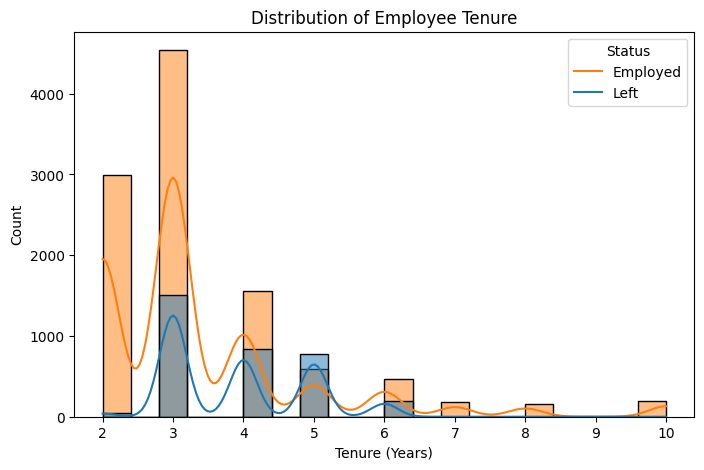

In [7]:
# Histogram of employee tenure
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='tenure', hue='status', bins=20, kde=True)
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.title('Distribution of Employee Tenure')
plt.legend(title='Status', labels=['Employed', 'Left'])
plt.show()

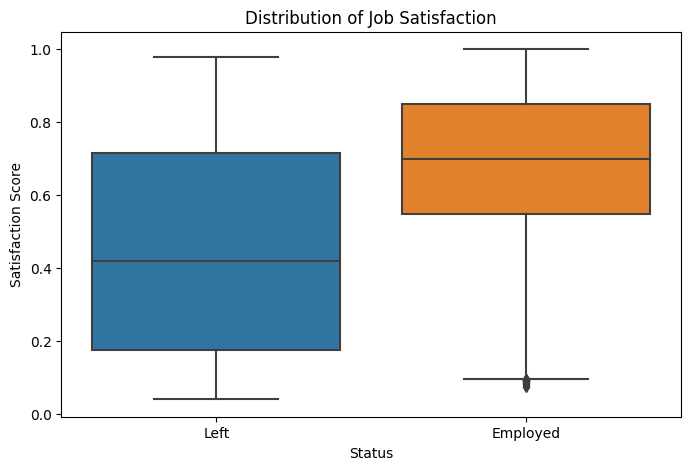

In [8]:
# Boxplot of job satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='status', y='satisfaction')
plt.xlabel('Status')
plt.ylabel('Satisfaction Score')
plt.title('Distribution of Job Satisfaction')
plt.show()

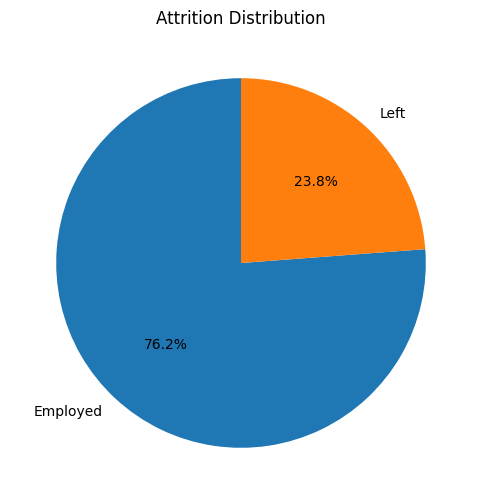

In [9]:
# Pie chart of attrition
attrition_counts = data['status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attrition Distribution')
plt.show()


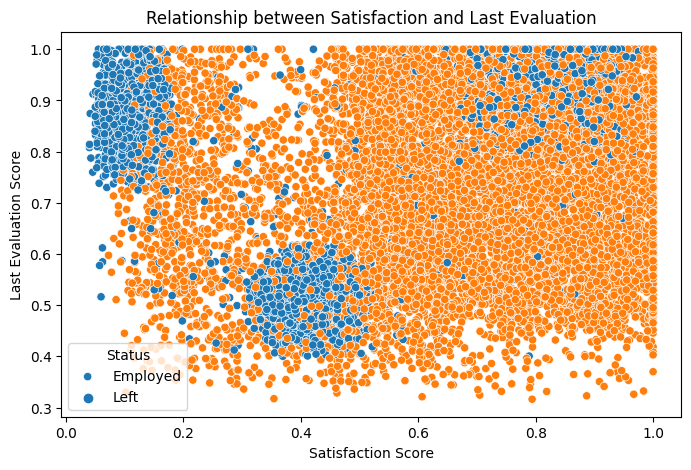

In [10]:
# Scatter plot of satisfaction vs. last evaluation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='satisfaction', y='last_evaluation', hue='status')
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Relationship between Satisfaction and Last Evaluation')
plt.legend(title='Status', labels=['Employed', 'Left'])
plt.show()

In [11]:

data['satisfaction'].fillna(data['satisfaction'].mean(), inplace=True)
data['tenure'].fillna(data['tenure'].mean(), inplace=True)

Decision Tree Modeling with Tree Pruning ad Split Criteria

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#split the dataset
X = data[['tenure', 'satisfaction', 'n_projects']]
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)



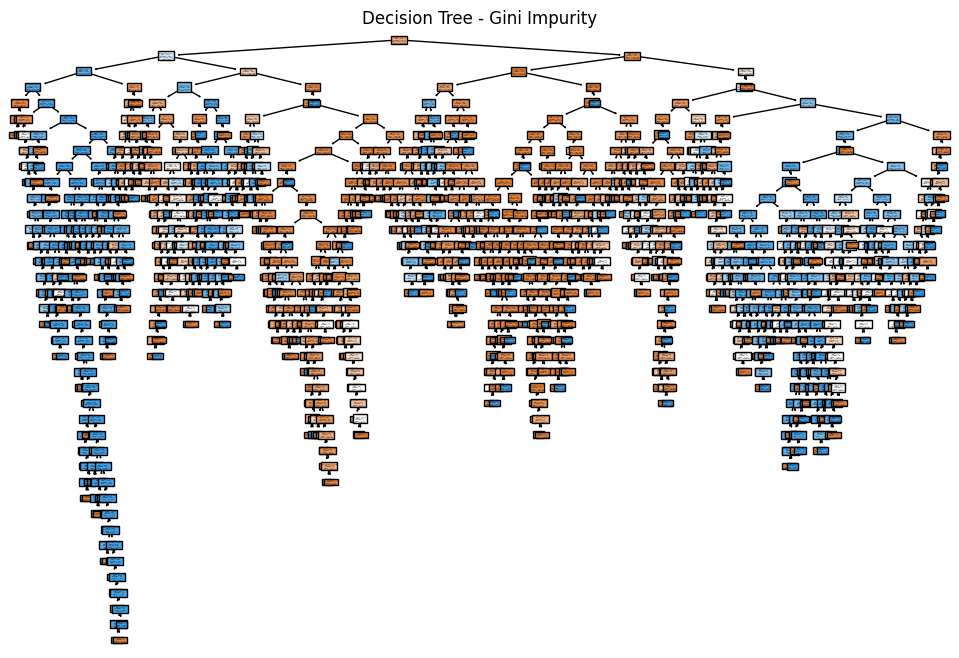

In [15]:
#build decision tree classifiers with Gini impurity criteria
clf_gini = DecisionTreeClassifier(criterion='gini')

#fit the model
clf_gini.fit(X_train, y_train)

#visualize decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Employed','Left'])
plt.title('Decision Tree - Gini Impurity')
plt.show()

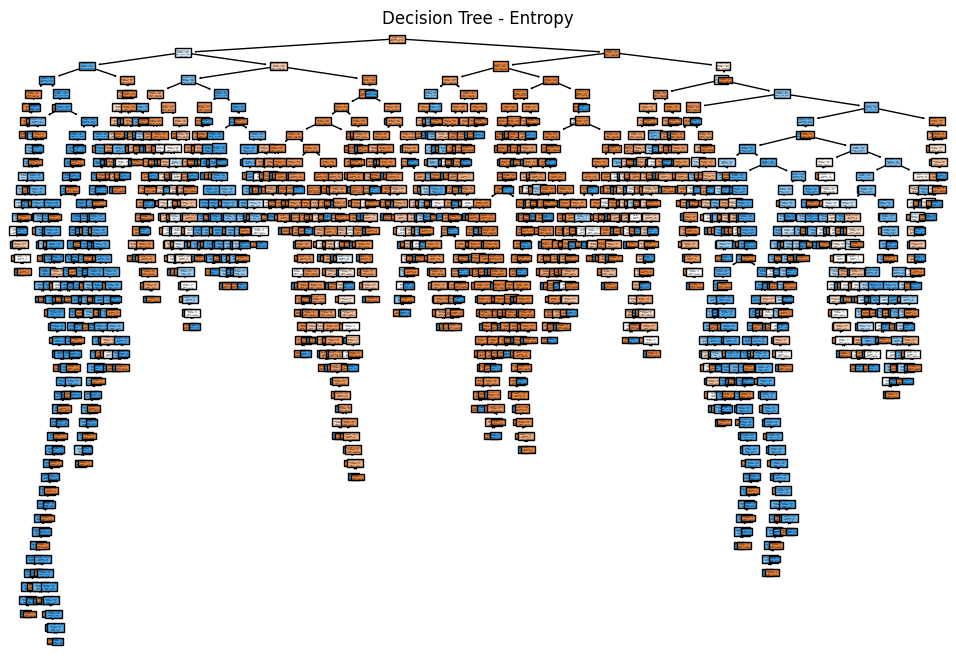

In [16]:
#build decision tree classifiers with Gini impurity criteria
clf_entropy = DecisionTreeClassifier(criterion='entropy')

#fit the model
clf_entropy.fit(X_train, y_train)

#visualize decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Employed','Left'])
plt.title('Decision Tree - Entropy')
plt.show()

Model Evaluation

In [17]:
def evaluate_model(clf, X_test, y_test):
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label='Left')
  recall = recall_score(y_test, y_pred, pos_label='Left')
  f1 = f1_score(y_test, y_pred, pos_label='Left')
  cm = confusion_matrix(y_test, y_pred, labels=['Employed', 'Left'])
  return accuracy, precision, recall, f1, cm

accuracy_gini, precision_gini, recall_gini, f1_gini, cm_gini = evaluate_model(clf_gini, X_test, y_test)
accuracy_entropy, precision_entorpy, recall_entropy, f1_entropy, cm_entropy = evaluate_model(clf_entropy, X_test, y_test)


In [18]:
print("Model Evaluation - Gini Impurity")
print(f"Accuracy: {accuracy_gini:.2f}")
print(f"Precision: {precision_gini:.2f}")
print(f"Recall: {recall_gini:.2f}")
print(f"F1 Score: {f1_gini:.2f}")
print(f"Confusion Matrix: ")
print(cm_gini)

Model Evaluation - Gini Impurity
Accuracy: 0.92
Precision: 0.86
Recall: 0.81
F1 Score: 0.84
Confusion Matrix: 
[[2070   91]
 [ 129  560]]


In [19]:
print("Model Evaluation - Etropy")
print(f"Accuracy: {accuracy_entropy:.2f}")
print(f"Precision: {precision_entorpy:.2f}")
print(f"Recall: {recall_entropy:.2f}")
print(f"F1 Score: {f1_entropy:.2f}")
print(f"Confusion Matrix: ")
print(cm_entropy)

Model Evaluation - Etropy
Accuracy: 0.93
Precision: 0.87
Recall: 0.83
F1 Score: 0.85
Confusion Matrix: 
[[2074   87]
 [ 119  570]]


Feature Importance Visualization


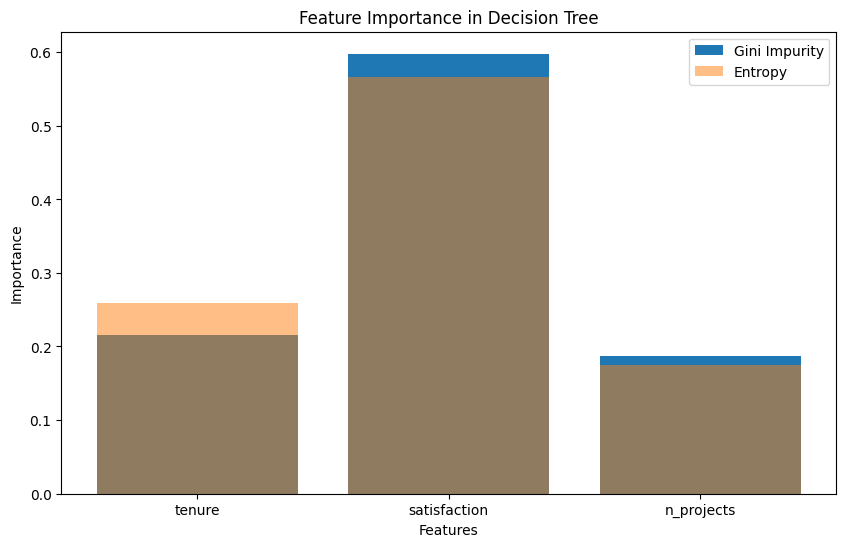

In [20]:
#feature importance - Gini Impurity
feature_importance_gini = clf_gini.feature_importances_

#feature importance - entropy
feature_importance_entropy = clf_entropy.feature_importances_

#bar chart for feature importance
plt.figure(figsize=(10,6))
plt.bar(X.columns, feature_importance_gini, label='Gini Impurity')
plt.bar(X.columns, feature_importance_entropy, label='Entropy', alpha=0.5)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.legend()
plt.show()